In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [4]:
energy_data = pd.read_csv("/Users/admin/Desktop/Data Analyst - Scientist Career/Data Science - Analytics/Datasets/Energy Consumption in London/daily_dataset.csv")
energy_data["day"]=pd.to_datetime(energy_data["day"])
energy_data.replace([np.inf, -np.inf], np.nan, inplace=True)
energy_data.dropna()
energy_data.head(2)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031


##### *Originally, there was some cells which are null, dropna() was used to remove these cells as they were very few in number and their removal is less likely to affect the overall analysis*

In [5]:
weather_data = pd.read_csv("/Users/admin/Desktop/Data Analyst - Scientist Career/Data Science - Analytics/Datasets/Energy Consumption in London/weather_daily_darksky.csv")
weather_data['day']=  pd.to_datetime(weather_data['time']) # day is given as timestamp
weather_data.replace([np.inf, -np.inf], np.nan, inplace=True)
weather_data.dropna()
weather_data.head(2)

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,day
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52,2011-11-11
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53,2011-12-11


In [26]:
energy_by_weather=energy_data.merge(weather_data, on="day")
energy_by_weather = energy_by_weather.sort_values(by="day").reset_index()
energy_by_weather= energy_by_weather.drop(["index", "icon", "precipType", "energy_median","pressure","cloudCover","windSpeed","uvIndex", "humidity", "windBearing","apparentTemperatureMinTime","apparentTemperatureHigh","visibility", "energy_std","temperatureMinTime","dewPoint", "temperatureMaxTime","apparentTemperatureHighTime","apparentTemperatureLow","apparentTemperatureMax" ,"time","sunsetTime","temperatureHigh","sunriseTime","temperatureLow","energy_sum", "energy_count", "energy_max", "energy_min", "temperatureHighTime", "uvIndexTime", "summary", "temperatureLowTime", "apparentTemperatureMin", "apparentTemperatureMaxTime", "apparentTemperatureLowTime", "moonPhase"], axis =1).reset_index()
energy_by_weather.head(2) 

,index,LCLid,day,energy_mean,temperatureMax,temperatureMin
0,0,MAC000155,2011-11-23,0.421864,10.36,3.81
1,1,MAC000152,2011-11-23,0.248708,10.36,3.81


In [7]:
missing_values = energy_by_weather['energy_mean'].isna().sum()
print("Number of missing values in energy_mean:", missing_values)
energy_by_weather.dropna(subset=['energy_mean'], inplace=True)

Number of missing values in energy_mean: 28


In [8]:
energy_by_weather.dropna(subset=['energy_mean'], inplace=True)

### Assumption

1. The maximum and minimum temperature will be grouped into range of values to allow for better visualization.
2. Due to the very large dataset, We will plot the grouped maximum and minimum temperature against a range of energy mean to check for the correlation using a boxplot visualization. 
3. We assume the maximum and minimum temperature that falls in this range of energy_mean has similar correllation with energy_mean has the values outisde of these range.

In [9]:
#The energy_mean column is grouped into low, medium and high category
bins = np.linspace(min(energy_by_weather["energy_mean"]), max(energy_by_weather["energy_mean"]),4)
group_names = ["Low", "Medium", "High"]
energy_by_weather["energy_mean_category"] = pd.cut(energy_by_weather["energy_mean"], bins, labels=group_names, include_lowest=True)

bins = np.linspace(min(energy_by_weather["temperatureMax"]), max(energy_by_weather["temperatureMax"]),4)
group_names = ["Low", "Medium", "High"]
energy_by_weather["temperatureMax_category"] = pd.cut(energy_by_weather["temperatureMax"], bins, labels=group_names, include_lowest=True)

bins = np.linspace(min(energy_by_weather["temperatureMin"]), max(energy_by_weather["temperatureMin"]),4)
group_names = ["Low", "Medium", "High"]
energy_by_weather["temperatureMin_category"] = pd.cut(energy_by_weather["temperatureMin"], bins, labels=group_names, include_lowest=True)
#Checking a sample of the data
energy_by_weather.head(5)

,index,LCLid,day,energy_mean,temperatureMax,temperatureMin,energy_mean_category,temperatureMax_category,temperatureMin_category
0,0,MAC000155,2011-11-23,0.421864,10.36,3.81,Low,Medium,Medium
1,1,MAC000152,2011-11-23,0.248708,10.36,3.81,Low,Medium,Medium
2,2,MAC000153,2011-11-23,0.904250,10.36,3.81,Low,Medium,Medium
3,3,MAC000156,2011-11-23,0.296500,10.36,3.81,Low,Medium,Medium
4,4,MAC000147,2011-11-23,0.108429,10.36,3.81,Low,Medium,Medium


In [10]:
#rearranging the columns
cols = ["LCLid", "day","energy_mean", "energy_mean_category", "temperatureMax","temperatureMax_category","temperatureMin", "temperatureMin_category", "icon"]
energy_by_weather = energy_by_weather.reindex(cols, axis=1)
energy_by_weather.dropna()
energy_by_weather.head(2)

,LCLid,day,energy_mean,energy_mean_category,temperatureMax,temperatureMax_category,temperatureMin,temperatureMin_category,icon
0,MAC000155,2011-11-23,0.421864,Low,10.36,Medium,3.81,Medium,NaN
1,MAC000152,2011-11-23,0.248708,Low,10.36,Medium,3.81,Medium,NaN


(0.0, 1.0)

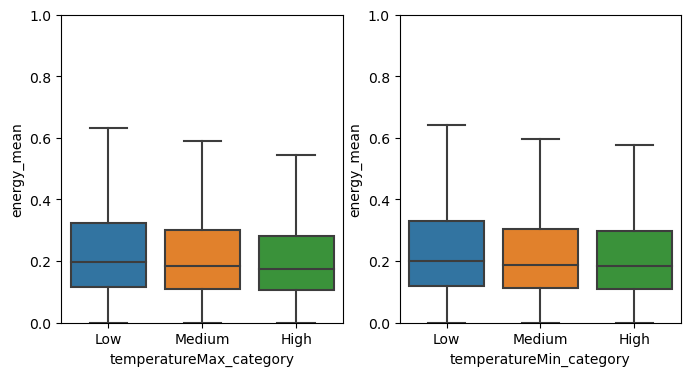

In [11]:
#ploting a graph
figures, axs=plt.subplots(1,2, figsize=(8, 4))
fig1 = sns.boxplot(data=energy_by_weather, x="temperatureMax_category", y="energy_mean", fliersize=0, ax=axs[0])
fig2 = sns.boxplot(data=energy_by_weather, x="temperatureMin_category", y="energy_mean", fliersize=0, ax=axs[1])
fig1.set_ylim(0,  1)
fig2.set_ylim(0,  1)

Following the principle of multi-colinearity, it is assumed that both temperatureMax and temperatureMin have similar correlation with energy mean hence we can choose to use either temperatureMax or temperatureMin for our modelling.

## Performing Regression Analysis on the data.

1. The model will be built to predict energy_mean based the observed temperature.
2. Taking Y-variables as the dependent variable (Outcome Variable): 
   - energy_mean
3. Taking x-variables as the independent variable (Predictor variable):  
    -temperature

Formula = [ Y = B0 + B1X]

Where B0 = Intercept,
      B1 = Slope

In [12]:
from sklearn import linear_model

In [17]:
reg = linear_model.LinearRegression()
reg.fit(energy_by_weather[["temperatureMax"]], energy_by_weather['energy_mean'])

LinearRegression()

In [18]:
import pandas as pd

# Create a DataFrame with a column named 'temperatureMax' containing the input data
new_data = pd.DataFrame({'temperatureMax': [-10]})

# Use the predict method with the DataFrame
predictions = reg.predict(new_data)
print(predictions)

[0.32273435]


In [21]:
x = energy_by_weather["temperatureMax"].values.reshape(-1, 1)
y = energy_by_weather["energy_mean"]
reg.score(x, y)

/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.0035906198905650832

### This predictive model can be used to predict the energy usage at any given temperature value.

The R-squared score typically ranges between 0 and 1, where 1 indicates a perfect fit to the data, and values closer to 0 suggest that the model doesn't explain much of the variance in the data. In this case, the R-squared score is quite low, indicating that the linear regression model may not be a good fit for the data, or there might be other factors affecting the relationship between the "temperatureMax" feature and the "energy_mean" target variable that the model is not capturing. It might be better to explore other modeling approaches or consider if additional features could improve the model's performance.